In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

iris = load_iris()

data_df = pd.DataFrame(data=iris.data,columns = iris.feature_names)
target_df = pd.DataFrame(data = iris.target, columns = ['target'])
df = pd.concat([data_df,target_df],axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
#!pip install tensorflow

In [3]:
x,y = df.drop('target',axis=1),df['target']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [4]:
s = StandardScaler()
xtrains = s.fit_transform(xtrain)
xtests = s.fit_transform(xtest)
#ytrains = s.fit_transform(ytrain)
#ytests = s.fit_transform(ytest)

In [5]:
!python --version
print(tf.__version__)

Python 3.11.3
2.15.0


In [6]:
dnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (xtrains.shape[1],)),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(16,activation = 'relu'),
    tf.keras.layers.Dense(3,activation = 'softmax')])

In [7]:
dnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history = dnn.fit(xtrains,ytrain,epochs=50,batch_size=32,validation_split=0.1)

Epoch 1/50


4/4 [==============================] - 1s 55ms/step - loss: 1.2050 - accuracy: 0.2037 - val_loss: 1.1415 - val_accuracy: 0.1667
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 1.1106 - accuracy: 0.3889 - val_loss: 1.0884 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0425 - accuracy: 0.5741 - val_loss: 1.0493 - val_accuracy: 0.6667
Epoch 4/50
4/4 [==============================] - 0s 10ms/step - loss: 0.9911 - accuracy: 0.6111 - val_loss: 1.0211 - val_accuracy: 0.6667
Epoch 5/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9512 - accuracy: 0.6481 - val_loss: 0.9961 - val_accuracy: 0.6667
Epoch 6/50
4/4 [==============================] - 0s 8ms/step - loss: 0.9146 - accuracy: 0.6944 - val_loss: 0.9731 - val_accuracy: 0.6667
Epoch 7/50
4/4 [==============================] - 0s 9ms/step - loss: 0.8793 - accuracy: 0.7222 - val_loss: 0.9466 - val_accuracy: 0.8333
Epoch 8/50
4/4 [============

In [9]:
loss,accuracy=dnn.evaluate(xtests,ytest)
print(f'test accuracy: {accuracy}')

1/1 [==============================] - 0s 17ms/step - loss: 0.1056 - accuracy: 0.9667
test accuracy: 0.9666666388511658


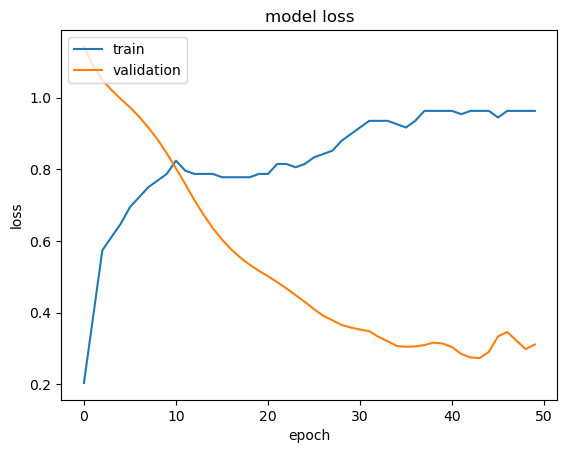

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()